In [4]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def _mse(self, y):
        """Вычисляет среднеквадратичную ошибку."""
        return np.mean((y - np.mean(y)) ** 2)

    def _split(self, X, y, feature_index, threshold):
        """Разделяет данные по признаку и порогу."""
        left_mask = X[:, feature_index] <= threshold
        right_mask = X[:, feature_index] > threshold
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _best_split(self, X, y):
        """Находит лучшее разделение данных."""
        best_feature, best_threshold, best_loss = None, None, float('inf')

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature_index, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                loss = self._mse(y_left) + self._mse(y_right)
                if loss < best_loss:
                    best_feature, best_threshold, best_loss = feature_index, threshold, loss

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        """Рекурсивно строит дерево."""
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return np.mean(y)

        feature, threshold = self._best_split(X, y)
        if feature is None:
            return np.mean(y)

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)

        return (feature, threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        """Обучает дерево."""
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        """Рекурсивно предсказывает значение для одного sample."""
        if not isinstance(tree, tuple):
            return tree
        feature, threshold, left_subtree, right_subtree = tree
        if x[feature] <= threshold:
            return self._predict_sample(x, left_subtree)
        else:
            return self._predict_sample(x, right_subtree)

    def predict(self, X):
        """Предсказывает значения для всех samples."""
        return np.array([self._predict_sample(x, self.tree) for x in X])

In [5]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Начальное предсказание — среднее значение y
        self.initial_prediction = np.mean(y)
        predictions = np.full_like(y, self.initial_prediction, dtype=float)

        for _ in range(self.n_estimators):
            # Вычисляем остатки
            residuals = y - predictions

            # Обучаем дерево на остатках
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X, residuals)

            # Обновляем предсказания
            predictions += self.learning_rate * tree.predict(X)

            # Сохраняем дерево
            self.trees.append(tree)

    def predict(self, X):
        # Начальное предсказание
        predictions = np.full(X.shape[0], self.initial_prediction, dtype=float)

        # Добавляем предсказания всех деревьев
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions
    

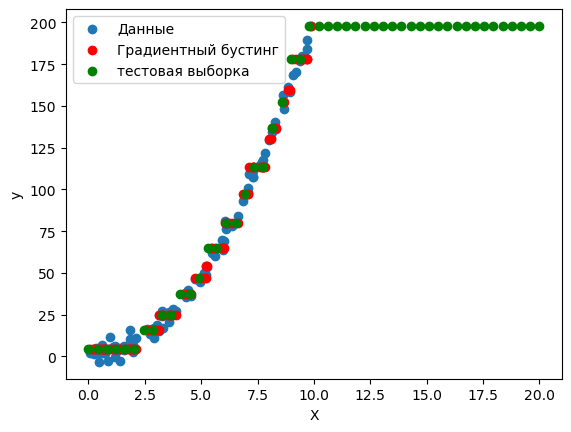

In [41]:
# Создаем синтетические данные
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() **2 + np.random.randn(100) * 4
X_test = arr = np.linspace(0, 20, 50).reshape(-1, 1)

# Обучаем градиентный бустинг
gb = DecisionTreeRegressor(max_depth=4, min_samples_split=2)
gb.fit(X, y)
y_test_pred = gb.predict(X_test)

# Предсказания
y_pred = gb.predict(X)

# Визуализация
plt.scatter(X, y, label="Данные")
plt.scatter(X, y_pred, color="red", label="Градиентный бустинг")
plt.scatter(X_test, y_test_pred, color="green", label="тестовая выборка")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

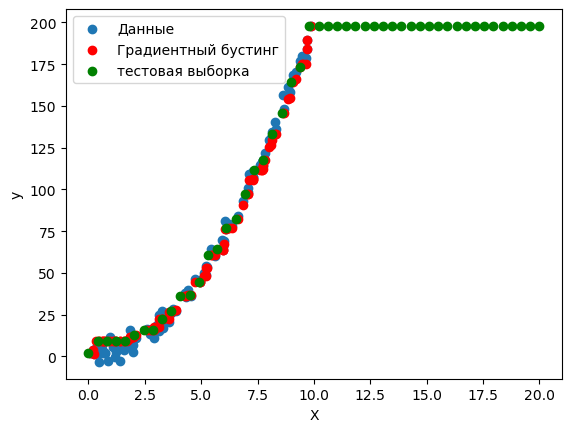

In [42]:
# Создаем синтетические данные
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() **2 + np.random.randn(100) * 4
X_test = arr = np.linspace(0, 20, 50).reshape(-1, 1)

# Обучаем градиентный бустинг
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X, y)

# Предсказания
y_pred = gb.predict(X)
y_test_pred = gb.predict(X_test)
# Визуализация
plt.scatter(X, y, label="Данные")
plt.scatter(X, y_pred, color="red", label="Градиентный бустинг")
plt.scatter(X_test, y_test_pred, color="green", label="тестовая выборка")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [32]:
print(np.linspace(1,10,10))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [35]:
y_pred.shape

(100,)

In [37]:
X.shape

(100, 1)

In [45]:
# Добавляем полиномиальные признаки
X_train_poly = np.hstack([X_train, X_train ** 2])
X_test_poly = np.hstack([X_test, X_test ** 2])
y_train_poly = 2 * X_train_poly.squeeze() **2 + np.random.randn(100) * 4

# Обучаем градиентный бустинг
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train_poly, y_train_poly)

# Предсказания
y_pred = gb.predict(X_test_poly)

# Визуализация
plt.scatter(X_train, y_train_poly, label="Обучающие данные")
plt.scatter(X_test, y_pred, color="red", label="Градиентный бустинг")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (80,2) (100,) 

In [46]:
import numpy as np

# Генерация обучающих данных
X_train = np.random.rand(100, 1) * 10  # X в диапазоне [0, 10]
y_train = 2 * X_train.squeeze() ** 2 + np.random.randn(100) * 4  # y = 2 * X^2 + шум

# Генерация тестовых данных
X_test = np.linspace(0, 20, 50).reshape(-1, 1)  # X в диапазоне [0, 20]
y_test = 2 * X_test.squeeze() ** 2 + np.random.randn(50) * 4  # y = 2 * X^2 + шум

In [47]:
# Добавляем полиномиальные признаки
X_train_poly = np.hstack([X_train, X_train ** 2])  # [X, X^2]
X_test_poly = np.hstack([X_test, X_test ** 2])    # [X, X^2]

In [48]:
# Обучаем градиентный бустинг
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train_poly, y_train)

# Предсказания
y_pred = gb.predict(X_test_poly)

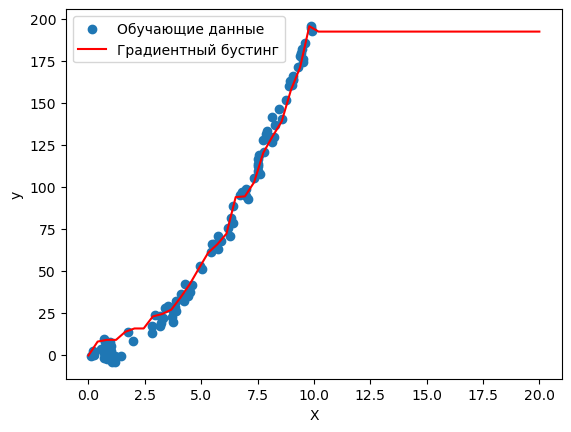

In [49]:
import matplotlib.pyplot as plt

# Визуализация
plt.scatter(X_train, y_train, label="Обучающие данные")
plt.plot(X_test, y_pred, color="red", label="Градиентный бустинг")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
